# Micro-Study 2: Relating Uranium Concentration with other parameters
---
> *The dataset of this notebook is sourced from* **[Central Ground Water Board (CGWB)](https://cgwb.gov.in/en)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("uranium2.csv")
df.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Amritsar,NaN,Jagdev Khurd (Dalla),31.9070,74.7391,7.58,1233.0,0.0,...,380.0,96.0,34.0,65.0,14.00,NaN,NaN,1.11,35.90,0.57
1,2023,Punjab,Amritsar,NaN,Laungo Mahal,31.9059,74.8189,7.96,683.0,0.0,...,200.0,40.0,24.0,87.0,6.00,NaN,NaN,0.04,54.06,3.77
2,2023,Punjab,Amritsar,NaN,Makowal,31.9046,74.8904,8.20,412.0,0.0,...,180.0,32.0,24.0,21.0,7.00,NaN,NaN,0.05,44.44,3.04
3,2023,Punjab,Amritsar,NaN,Malakpur,31.9534,74.8453,8.20,442.0,0.0,...,170.0,32.0,22.0,20.0,5.00,NaN,NaN,1.76,35.85,1.04
4,2023,Punjab,Amritsar,NaN,Ramdas,31.9667,74.9111,8.10,373.0,0.0,...,110.0,24.0,12.0,47.0,4.00,NaN,NaN,0.05,36.31,0.11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4281 non-null   object 
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

## EDA
---

<Figure size 1200x1200 with 0 Axes>

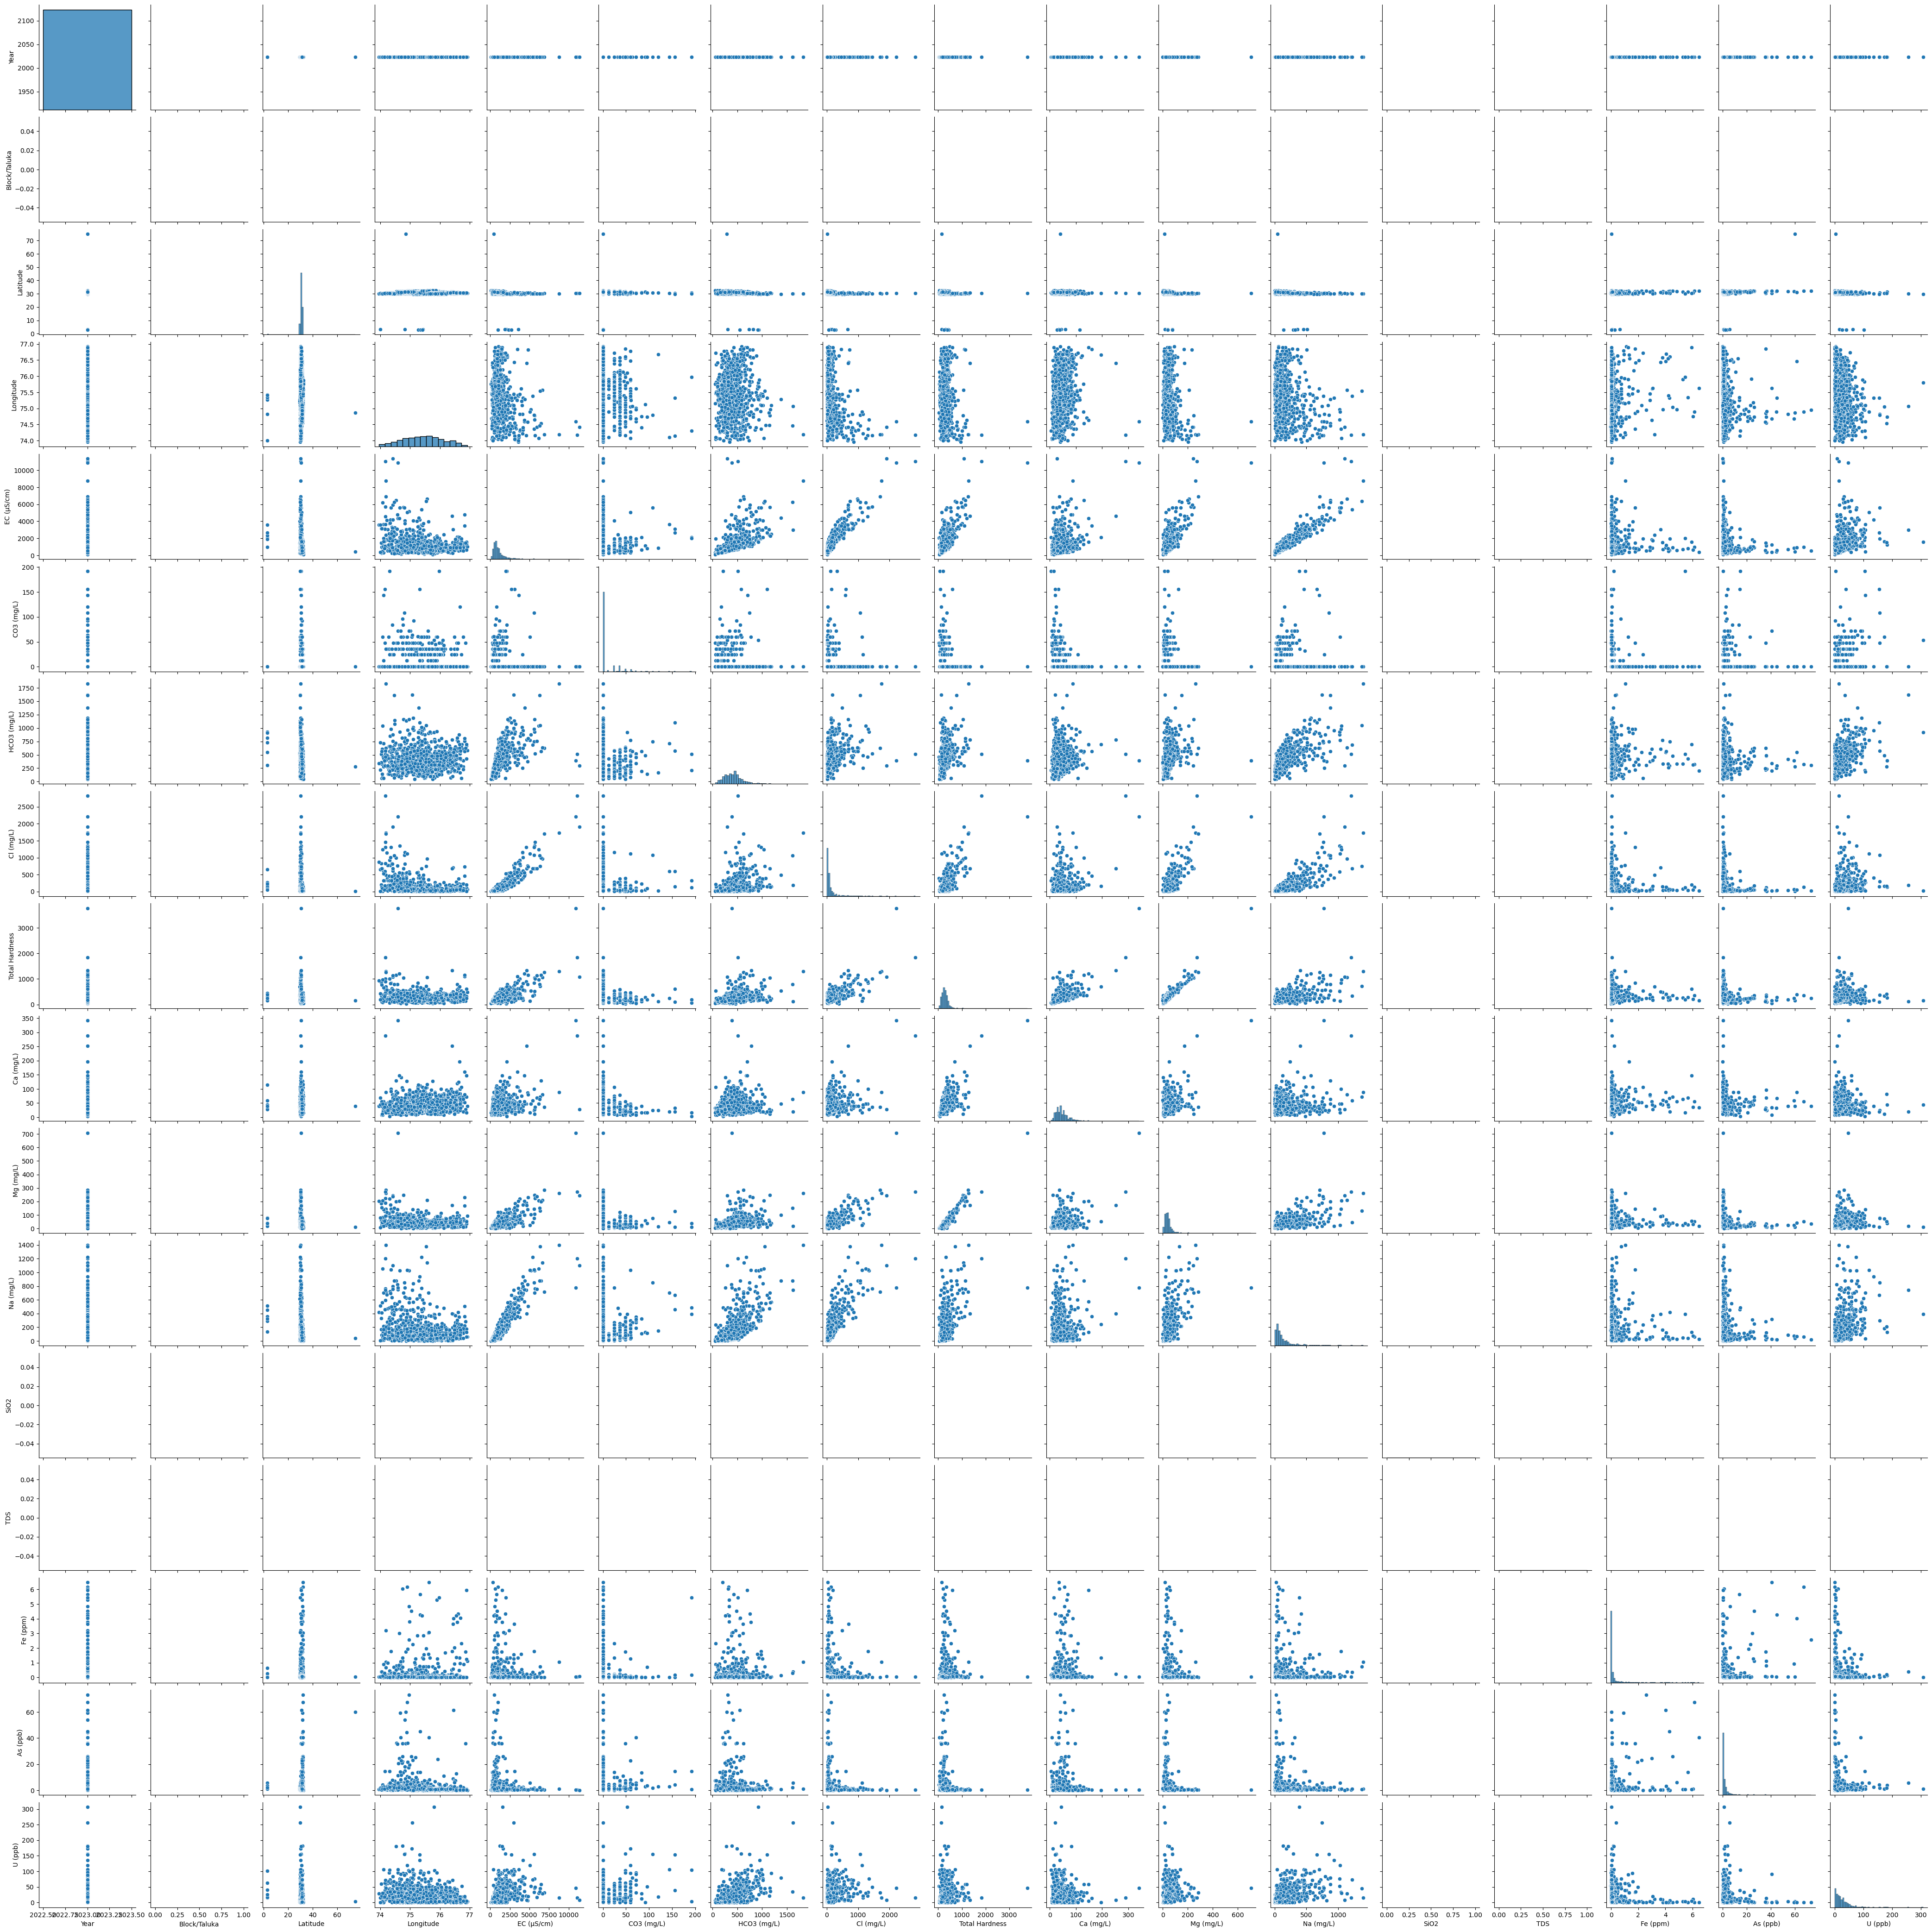

In [4]:
plt.figure(figsize=(12, 12))
sns.pairplot(df[df["Year"]==2023]) # Only using 2023 as it's the only year with Uranium conc
plt.show()

### Univariate Uranium distribution

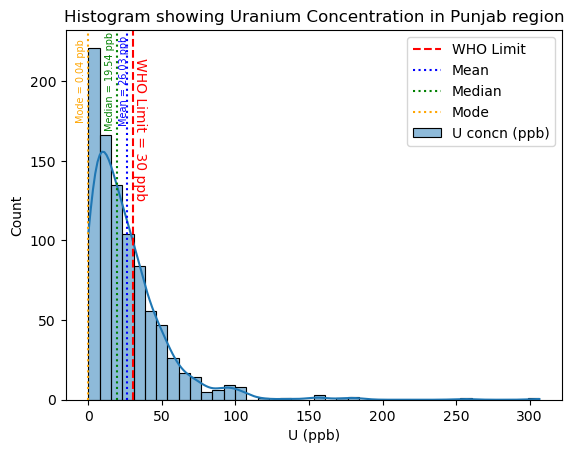

In [5]:
sns.histplot(data=df, x="U (ppb)", kde=True, bins=40, label="U concn (ppb)")

plt.axvline(x=30, color="red", linestyle="--", label="WHO Limit")
plt.text(35, 170, 'WHO Limit = 30 ppb', color='red', fontsize=10, rotation=-90, ha="center", va="center")

plt.axvline(x=df["U (ppb)"].mean(), color="blue", linestyle=":", label="Mean")
plt.text(24, 200, f'Mean = {df["U (ppb)"].mean():.2f} ppb', color='blue', fontsize=7, rotation=90, ha="center", va="center")

plt.axvline(x=df["U (ppb)"].median(), color="green", linestyle=":", label="Median")
plt.text(15, 200, f'Median = {df["U (ppb)"].median():.2f} ppb', color='green', fontsize=7, rotation=90, ha="center", va="center")

plt.axvline(x=df["U (ppb)"].mode()[0], color="orange", linestyle=":", label="Mode")
plt.text(-5, 200, f'Mode = {df["U (ppb)"].mode()[0]:.2f} ppb', color='orange', fontsize=7, rotation=90, ha="center", va="center")

plt.title("Histogram showing Uranium Concentration in Punjab region")
plt.legend()
plt.show()

The distribution looks like a normal distribution that's REALLY right-skewed!

#### Q: How much uranium is actually outside the WHO limit of 30 ppb?

In [6]:
u_above_limit_count = df[df["U (ppb)"] >= 30].shape[0]
total_u = df.shape[0]
print(
    f"Percentage of samples with Uranium > permissable limit \u2248 " +
    f"{np.round(u_above_limit_count*100/total_u, 2)}%"
)

Percentage of samples with Uranium > permissable limit ≈ 6.91%


Seems like quite a bit!

#### Q. Is this Curve really normally distributed?

We can check this by plotting the Q-Q plot of the data.

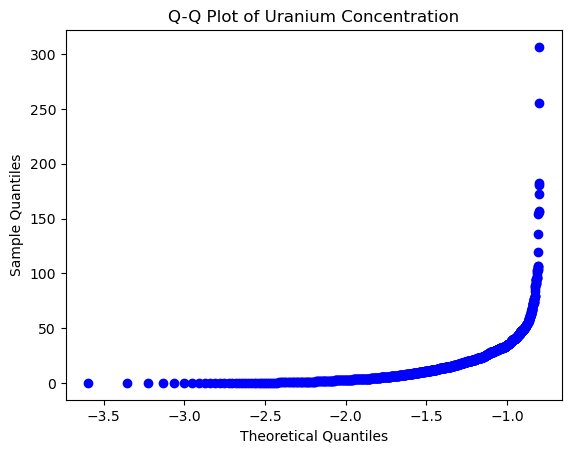

In [7]:
import scipy.stats as stats
stats.probplot(df["U (ppb)"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Uranium Concentration")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Ok this is REALLY right-skewed!

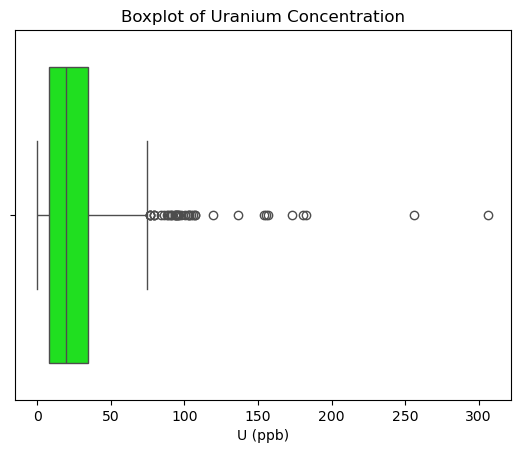

In [8]:
sns.boxplot(data=df, x="U (ppb)", orient="h", color="lime")
plt.title("Boxplot of Uranium Concentration")
plt.show()

#### Getting all moments to get shape of curve

In [9]:
u_mean = df["U (ppb)"].mean()
u_sd = df["U (ppb)"].std()
u_skew = df["U (ppb)"].skew()
u_kurt = df[["U (ppb)"]].kurtosis().iloc[0] - 3
print(f"""\
Mean = {u_mean:.2f}
SD = {u_sd:.2f}
Skewness = {u_skew:.2f}
Excess Kurtosis = {u_kurt:.2f}\
""")

Mean = 26.03
SD = 27.55
Skewness = 3.36
Excess Kurtosis = 18.17


**Observations:-**
1. Mean is not centered @ 0 => Not a standard distribution
2. Std > mean lol!
3. +vely right-skewed
4. Highly leptokurtic => Outliersss

#### Trying to fix the skewed distribution

##### 1. To centralise mean: `x - mean(x)`

In [10]:
np.round((df["U (ppb)"] - df["U (ppb)"].mean()).mean(), 3)

np.float64(-0.0)

##### 2. To decrease deviation: `x - mean(x) / sd(x)` => Standard Normal Distrbution!

In [11]:
np.round(((df["U (ppb)"] - df["U (ppb)"].mean()) / df["U (ppb)"].std()).std(), 3)

np.float64(1.0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_data = sc.fit_transform(df[["U (ppb)"]].dropna().values.reshape(-1, 1))
print(f"Standardized Mean: {sc_data.mean():.2f}")
print(f"Standardized Std: {sc_data.std():.2f}")

Standardized Mean: -0.00
Standardized Std: 1.00


##### 3. To [decrease skewness](https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/): `sqrt, cbrt, fourth rt, ...` **or** `log(x)` **or** `1/x` **or** **`PowerTransform(x)` {*Box-Cox* & *Yeo-Johnson* transformations}** **or** **`QuantileTransform(x)`**

Unskewed Mean: -0.00
Unskewed Std: 1.00
Unskewed Skewness: -0.01362
Unskewed Excess Kurtosis: -2.71444


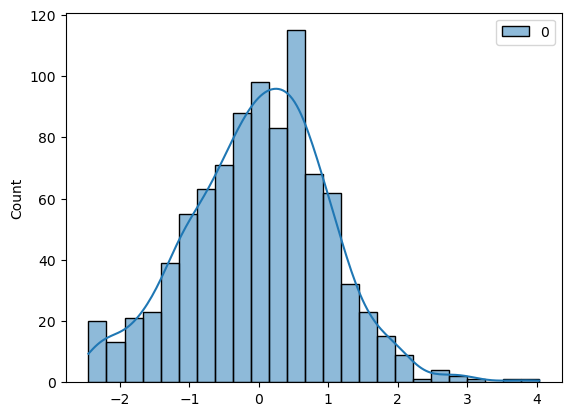

In [13]:
# Power Transformation

from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, kurtosis

pt = PowerTransformer(method='box-cox', standardize=True)
pt_data = pt.fit_transform(df[["U (ppb)"]].dropna().values.reshape(-1, 1))
print(f"Unskewed Mean: {pt_data.mean():.2f}")
print(f"Unskewed Std: {pt_data.std():.2f}")
print(f"Unskewed Skewness: {skew(pt_data)[0]:.5f}")
print(f"Unskewed Excess Kurtosis: {kurtosis(pt_data)[0] - 3:.5f}")

sns.histplot(pt_data, kde=True)
plt.show()

##### 4. To make it mesokurtic: `QuantileTransformer(x)`

Unskewed Mean: -0.00
Unskewed Std: 1.00
Unskewed Skewness: -0.30882
Unskewed Excess Kurtosis: -0.60900


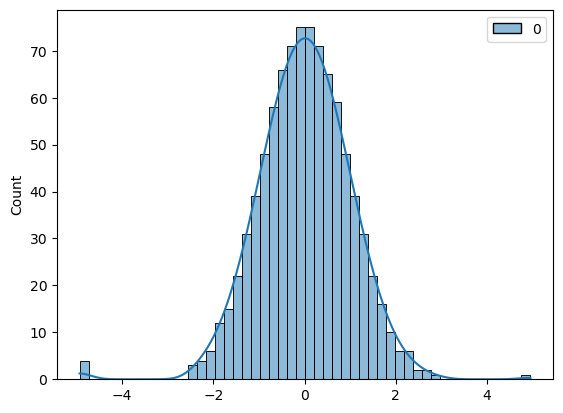

In [14]:
# Quantile Transformation

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

qt = QuantileTransformer(output_distribution="normal", n_quantiles=df["U (ppb)"].dropna().shape[0])
qt_data = qt.fit_transform(df[["U (ppb)"]].dropna().values.reshape(-1, 1))

# Further standardizing mean & std from Normal to Std. Normal
sc = StandardScaler()
new_sc_data = sc.fit_transform(qt_data)

print(f"Unskewed Mean: {new_sc_data.mean():.2f}")
print(f"Unskewed Std: {new_sc_data.std():.2f}")
print(f"Unskewed Skewness: {skew(new_sc_data)[0]:.5f}")
print(f"Unskewed Excess Kurtosis: {kurtosis(new_sc_data)[0] - 3:.5f}")

sns.histplot(new_sc_data, kde=True, bins=50)
plt.show()

Yay!!!

### General Bivariate Analysis of Uranium concentration vs Other Variables

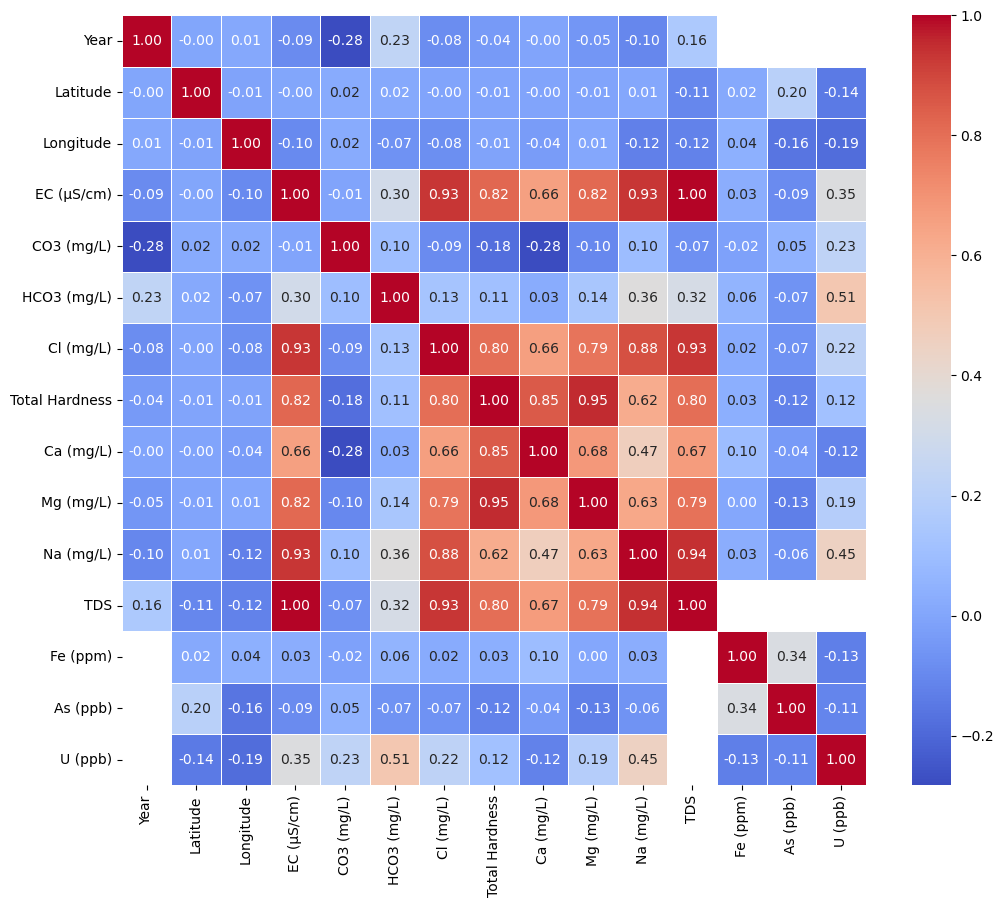

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.show()

Uranium depends on various environmental and geological factors, including correlation with certain heavy metals, minerals in the groundwater, and the overall geological history of the area. 

But the most surprising is the relationships it shares with $Na$, $CO_3$ $HCO_3$, which seem to influence its *solubility*!

<!-- TODO -->
### Uranium vs Other Heavy Metals

In [21]:
# Defining the heavy metals 

heavy_metals = {
    "Arsenic": "As (ppb)",
    "Iron": "Fe (ppm)"
}

In [29]:
# Making Linear Plot comparing with Uranium

def linear_plot(df: pd.DataFrame, elem_dict: dict[str, str], title: str = "?", colors = []) -> None:
    """
	Plots bivariate relationships between Uranium concentration and other elements.

	This function generates line plots and histograms to visualize the relationship 
	between Uranium concentration ('U (ppb)') and the concentrations of other elements 
	specified in the `elem_dict`. Each element is plotted against Uranium in a line plot, 
	and its distribution is shown in a histogram.

	Parameters:
	- df (pd.DataFrame): The dataframe containing the data with column "U (ppb)" for Uranium concentration.
	- elem_dict (dict): A dictionary where keys are element names (str) and values are 
	  column names (str) in the dataframe corresponding to those elements.
	- title (str, optional): A title for the plot. Defaults to "?".
	- colors (list, optional): A list of colors for the plots. If not provided, 
	  a default seaborn color palette is used.

	Returns:
	- None: The function only displays the plots and does not return any value.
	"""
    

    if not colors:
        colors = sns.color_palette("husl", len(elem_dict))
        
    plt.figure(figsize=(6*len(elem_dict), 6*2))
    plt.suptitle(f"Uranium vs {title} Concentrations", fontsize=16)

    for i, (elem_name, elem_col) in enumerate(elem_dict.items(), start=1):
        plt.subplot(2, len(elem_dict), i)
        sns.lineplot(data=df, x=elem_col, y="U (ppb)", color=colors[i-1], markers=True, marker="o", markersize=5)
        plt.title(f"Uranium vs {elem_name} Concentration")
        plt.xlabel(elem_col)
        plt.ylabel("U (ppb)")
        
        plt.subplot(2, len(elem_dict), i + len(elem_dict))
        sns.histplot(data=df, x=elem_col, kde=True, bins=100, color=colors[i-1])
        plt.title(f"{elem_name} Concentration Distribution")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    return None

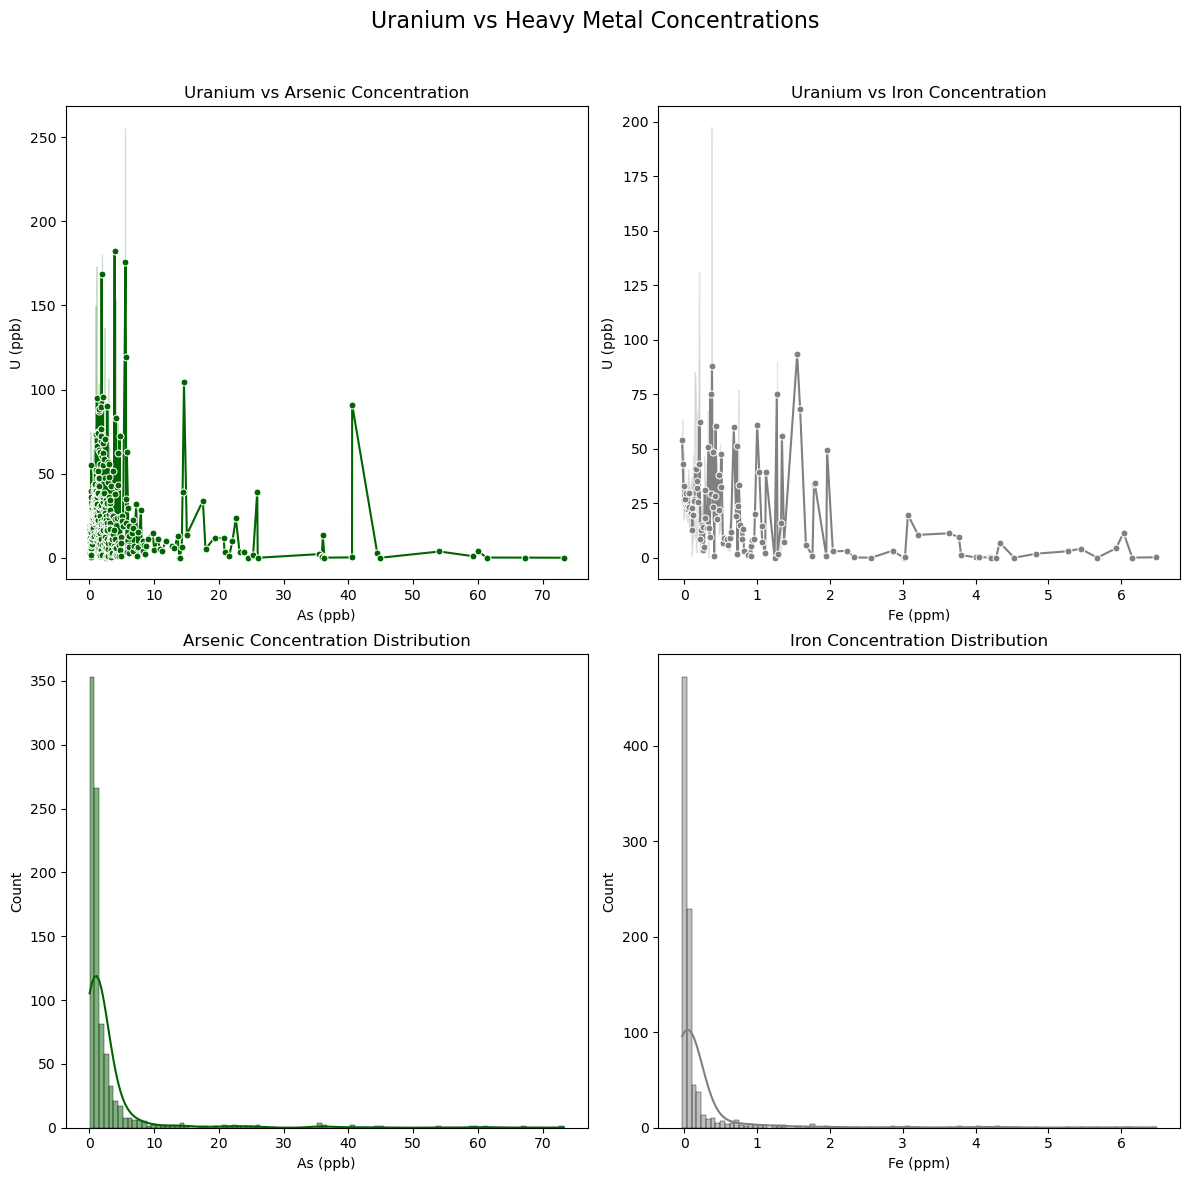

In [30]:
linear_plot(df, heavy_metals, title="Heavy Metal", colors=["darkgreen", "grey"])

#### Q. Why is the graph so noisy?

1. **Redox Heterogeneity:** Heavy metals like uranium, arsenic, and iron respond dramatically differently to varying oxidation-reduction conditions within the same aquifer. *Uranium becomes highly mobile under oxidizing conditions as uranyl complexes*, while *arsenic mobilization typically occurs under reducing conditions through reductive dissolution of iron oxides*. Iron exhibits complex behavior across redox gradients, with *soluble Fe(II) predominating under reducing conditions* and *insoluble Fe(III) oxides forming under oxidizing conditions*.
2. **Spatial Geochemical Variability:** Different geological formations within the same study area release metals through distinct weathering processes - *silicate weathering*, *carbonate dissolution*, and *ion exchange reactions* occur at different rates and scales. The *contact zones* between geological formations, such as the boundary between volcanic ash deposits and sedimentary rocks, show particularly complex metal relationships.
3. **pH and Alkalinity Controls:** High pH and alkalinity conditions can simultaneously enhance uranium mobility through *carbonate complexation* while affecting arsenic and iron behavior differently. This creates scenarios where metals that might be expected to correlate actually show *inverse relationships*.

##### TODO: Fixing this to be more interpretable

In [41]:
# Making QUANTILE SCALED Plots comparing with Uranium
from sklearn.preprocessing import QuantileTransformer

def quantile_plot(df: pd.DataFrame, elem_dict: dict[str, str], colors = []) -> None:
    """
    """

    if not colors:
        colors = sns.color_palette("husl", len(elem_dict))

    plt.figure(figsize=(5*len(elem_dict), 5*2))
    plt.suptitle("Uranium vs Heavy Metal Concentrations (QUANTILE TRANSFORMED)", fontsize=16)

    qt = QuantileTransformer(output_distribution="uniform", n_quantiles=df["U (ppb)"].dropna().shape[0])
    qt_u = qt.fit_transform(df[["U (ppb)"]].dropna().values.reshape(-1, 1)).flatten()
    # qt_u = df["U (ppb)"].dropna()

    for i, (elem_name, elem_col) in enumerate(elem_dict.items(), start=1):
        qt_elem = qt.fit_transform(df[[elem_col]].dropna().values.reshape(-1, 1)).flatten()
        # qt_elem = df[elem_col].dropna()

        plt.subplot(2, len(elem_dict), i)
        sns.lineplot(x=qt_elem, y=qt_u, color=colors[i-1], markers=True, marker="o", markersize=5)
        plt.title(f"Uranium vs {elem_name} Concentration (Quantile-Transformed)")
        plt.xlabel(elem_col)
        plt.ylabel("U (ppb)")

        plt.subplot(2, len(elem_dict), i + len(elem_dict))
        sns.histplot(x=qt_elem, kde=True, bins=100, color=colors[i-1])
        plt.title(f"{elem_name} Quantile-Transformed Concentration Distribution")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

    return None

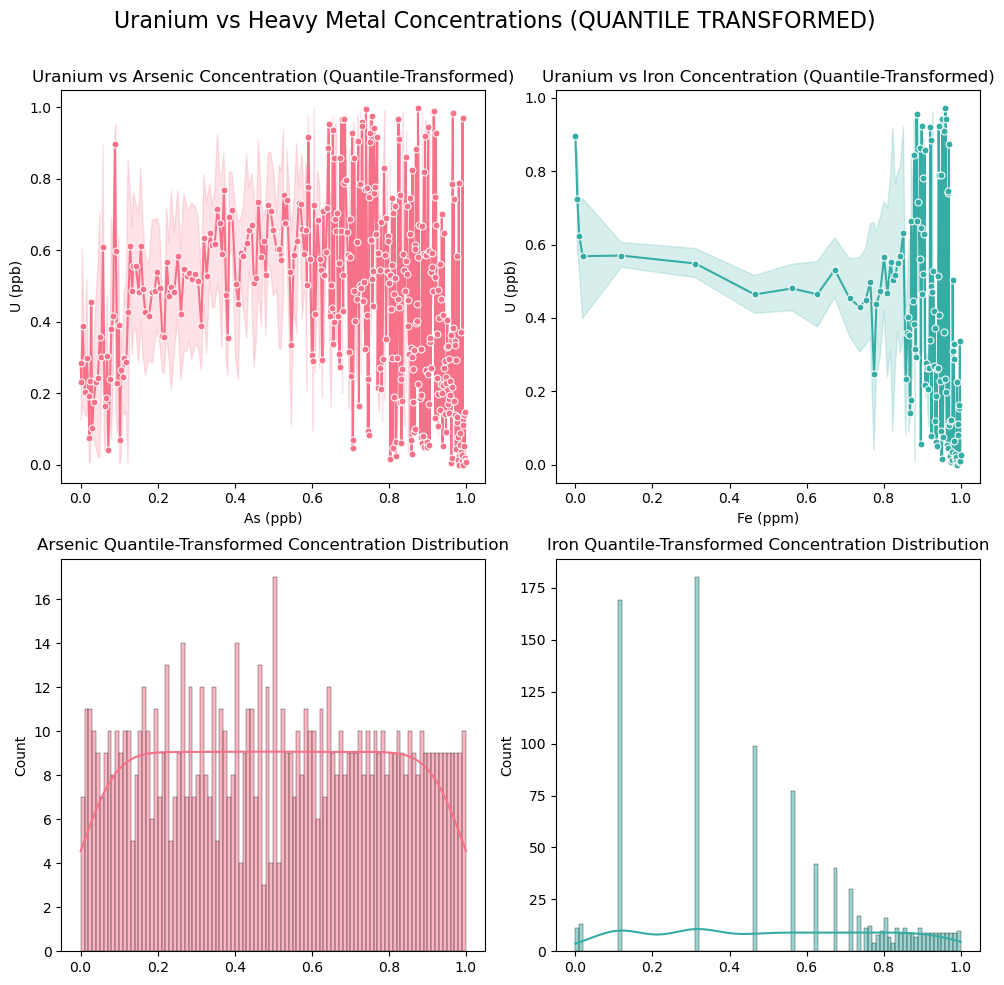

In [42]:
quantile_plot(df, heavy_metals)

### Uranium vs Dissolved Ions

In [31]:
dissolved_salts = {
    "Carbonate": "CO3 (mg/L)",
    "Bicarbonate": "HCO3 (mg/L)",
    "Chlorine": "Cl (mg/L)",
    "Sodium": "Na (mg/L)",
    "Magnesium": "Mg (mg/L)",
	"Calcium": "Ca (mg/L)",
}

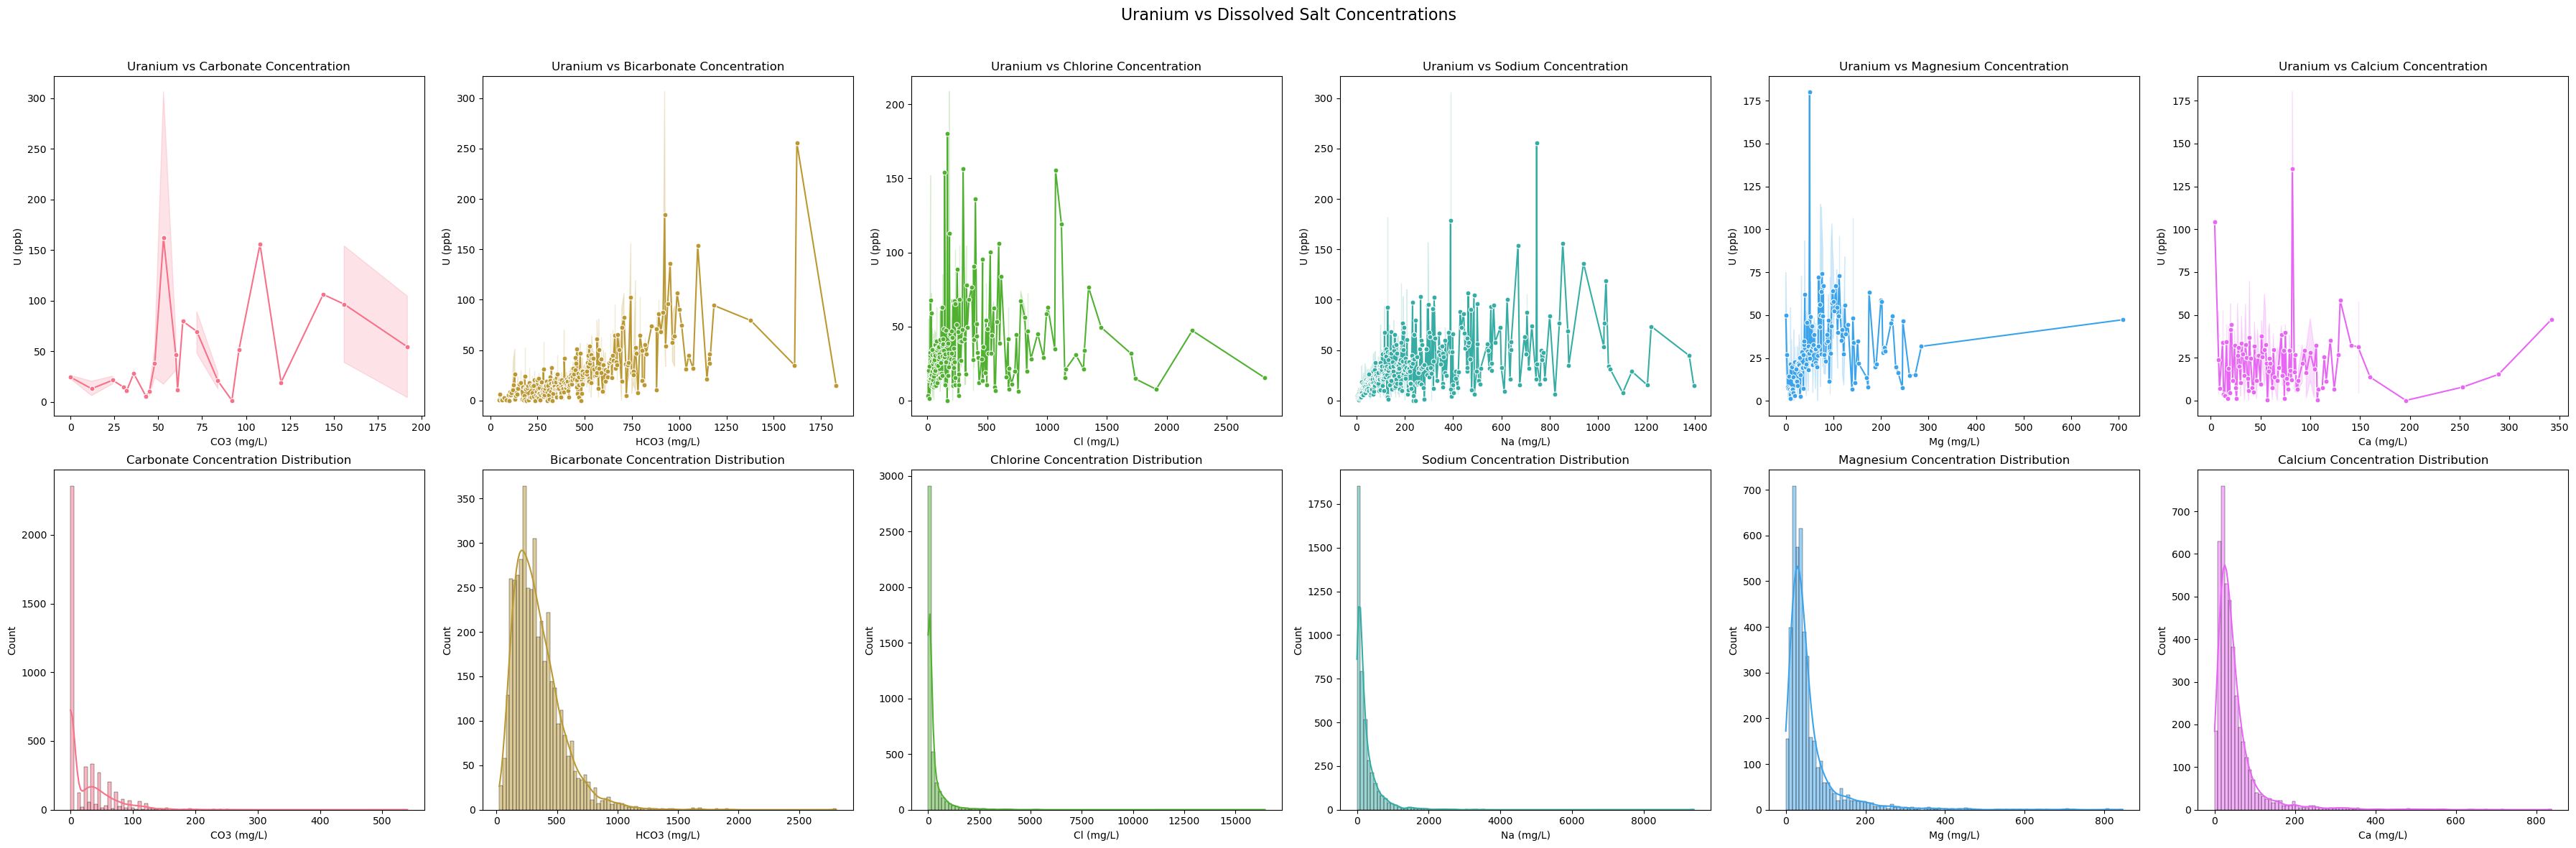

In [33]:
linear_plot(df, dissolved_salts, title="Dissolved Salt")

## Data Cleaning
---

In [4]:
df_clean = df.copy(deep=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4281 non-null   object 
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### From pH `object` to `float`

In [5]:
# Seeing why: this gives a list of  all unique non-float types
df["pH"][pd.to_numeric(df["pH"], errors="coerce").isna()].value_counts()

pH
Leaked    8
Name: count, dtype: int64

In [6]:
# Fixing this with NAs
df_clean["pH"] = pd.to_numeric(df["pH"], errors="coerce")

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### From F `object` to `float`

In [8]:
df["F (mg/L)"][pd.to_numeric(df["F (mg/L)"], errors="coerce").isna()].value_counts()

F (mg/L)
ND       1
<0.05    1
Name: count, dtype: int64

In [9]:
df_clean["F (mg/L)"] = df["F (mg/L)"].replace("<0.05", 0.05)
df_clean["F (mg/L)"] = df_clean["F (mg/L)"].replace("ND", np.nan)
df_clean["F (mg/L)"] = pd.to_numeric(df_clean["F (mg/L)"], errors="coerce")

In [10]:
df_clean["F (mg/L)"][
    pd.to_numeric(df_clean["F (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### Same with SO4, NO3, and PO4

In [12]:
df["SO4 (mg/L)"][pd.to_numeric(df["SO4 (mg/L)"], errors="coerce").isna()].value_counts()

SO4 (mg/L)
BDL    62
ND      1
Name: count, dtype: int64

In [13]:
df_clean["SO4 (mg/L)"] = pd.to_numeric(df["SO4 (mg/L)"], errors="coerce")

In [14]:
df_clean["SO4 (mg/L)"][
    pd.to_numeric(df_clean["SO4 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df["NO3 (mg/L)"][pd.to_numeric(df["NO3 (mg/L)"], errors="coerce").isna()].value_counts()

NO3 (mg/L)
BDL    26
Name: count, dtype: int64

In [16]:
df_clean["NO3 (mg/L)"] = pd.to_numeric(df["NO3 (mg/L)"], errors="coerce")

In [17]:
df_clean["NO3 (mg/L)"][
    pd.to_numeric(df_clean["NO3 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df["PO4 (mg/L)"][pd.to_numeric(df["PO4 (mg/L)"], errors="coerce").isna()].value_counts()

PO4 (mg/L)
<0.10    332
<0.1     208
<0.01     59
ND         1
Name: count, dtype: int64

In [19]:
df_clean["PO4 (mg/L)"] = df_clean["PO4 (mg/L)"].str.replace("<", "")
df_clean["PO4 (mg/L)"] = pd.to_numeric(df_clean["PO4 (mg/L)"], errors="coerce")

In [20]:
df_clean["PO4 (mg/L)"][
    pd.to_numeric(df_clean["PO4 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4209 non-null   float64
 14  NO3 (mg/L)             4247 non-null   float64
 15  PO4 

### K & SiO2 `object` to `float`

In [22]:
df["K (mg/L)"][pd.to_numeric(df["K (mg/L)"], errors="coerce").isna()].value_counts()

K (mg/L)
<1    1
Name: count, dtype: int64

In [23]:
df_clean["K (mg/L)"] = df["K (mg/L)"].str.replace("<", "")
df_clean["K (mg/L)"] = pd.to_numeric(df_clean["K (mg/L)"], errors="coerce")

In [24]:
df_clean["K (mg/L)"][
    pd.to_numeric(df_clean["K (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [25]:
df["SiO2"][pd.to_numeric(df["SiO2"], errors="coerce").isna()].value_counts()

SiO2
ND    1
Name: count, dtype: int64

In [26]:
df_clean["SiO2"] = pd.to_numeric(df["SiO2"], errors="coerce")
df_clean["SiO2"][pd.to_numeric(df_clean["SiO2"], errors="coerce").isna()].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4209 non-null   float64
 14  NO3 (mg/L)             4247 non-null   float64
 15  PO4 

In [28]:
df_clean.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Amritsar,NaN,Jagdev Khurd (Dalla),31.9070,74.7391,7.58,1233.0,0.0,...,380.0,96.0,34.0,65.0,14.0,NaN,NaN,1.11,35.90,0.57
1,2023,Punjab,Amritsar,NaN,Laungo Mahal,31.9059,74.8189,7.96,683.0,0.0,...,200.0,40.0,24.0,87.0,6.0,NaN,NaN,0.04,54.06,3.77
2,2023,Punjab,Amritsar,NaN,Makowal,31.9046,74.8904,8.20,412.0,0.0,...,180.0,32.0,24.0,21.0,7.0,NaN,NaN,0.05,44.44,3.04
3,2023,Punjab,Amritsar,NaN,Malakpur,31.9534,74.8453,8.20,442.0,0.0,...,170.0,32.0,22.0,20.0,5.0,NaN,NaN,1.76,35.85,1.04
4,2023,Punjab,Amritsar,NaN,Ramdas,31.9667,74.9111,8.10,373.0,0.0,...,110.0,24.0,12.0,47.0,4.0,NaN,NaN,0.05,36.31,0.11


## Initial EDA
---

In [32]:
# Dropping non-numeric shit
df_numeric = df_clean.drop(columns=df_clean.columns[1:5])
df_numeric.head()

,Year,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),HCO3 (mg/L),Cl (mg/L),F (mg/L),SO4 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,31.9070,74.7391,7.58,1233.0,0.0,476.0,92.0,0.61,19.0,...,380.0,96.0,34.0,65.0,14.0,NaN,NaN,1.11,35.90,0.57
1,2023,31.9059,74.8189,7.96,683.0,0.0,415.0,35.0,0.62,0.0,...,200.0,40.0,24.0,87.0,6.0,NaN,NaN,0.04,54.06,3.77
2,2023,31.9046,74.8904,8.20,412.0,0.0,254.0,21.0,0.56,0.0,...,180.0,32.0,24.0,21.0,7.0,NaN,NaN,0.05,44.44,3.04
3,2023,31.9534,74.8453,8.20,442.0,0.0,220.0,21.0,0.48,0.0,...,170.0,32.0,22.0,20.0,5.0,NaN,NaN,1.76,35.85,1.04
4,2023,31.9667,74.9111,8.10,373.0,0.0,238.0,14.0,0.83,0.0,...,110.0,24.0,12.0,47.0,4.0,NaN,NaN,0.05,36.31,0.11
